In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd

In [21]:
df = pd.read_csv('all_props_new.csv')

<Figure size 1000x600 with 0 Axes>

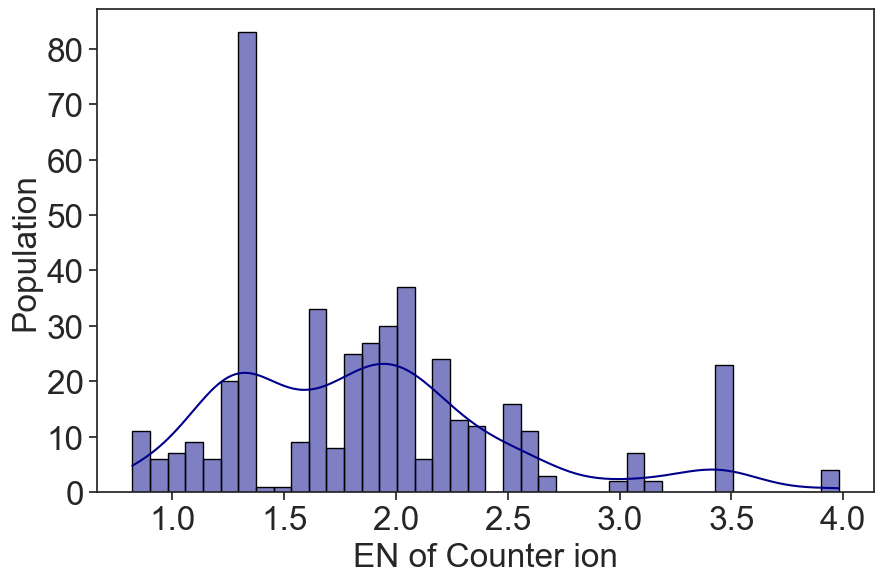

In [28]:
plt.figure(figsize=(10, 6))
sns.set_theme(style='ticks')
sns.displot(data=df, x='Electronegativity', bins=40, kde=True, height=6, aspect=1.5, 
            color='darkblue', edgecolor='black', linewidth=1)

plt.xlabel('EN of Counter ion', fontsize=24)
plt.ylabel('Population', fontsize=24)

# Customize ticks
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Add border around plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.tight_layout()
plt.show()

bins -  0- 1
        1- 2
        2- 3
        3- 4

In [6]:
df['Electronegativity'].fillna(0, inplace=True)

/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_3451/758592123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electronegativity'].fillna(0, inplace=True)


In [7]:
df = df[(df['Electronegativity'] > 1.5) & (df['Electronegativity'] <= 2)]

In [8]:
df['results_per_total'].mean()

9.976205240625136

In [9]:
df['ElectronAffinity'] = df['ElectronAffinity'].fillna(0)

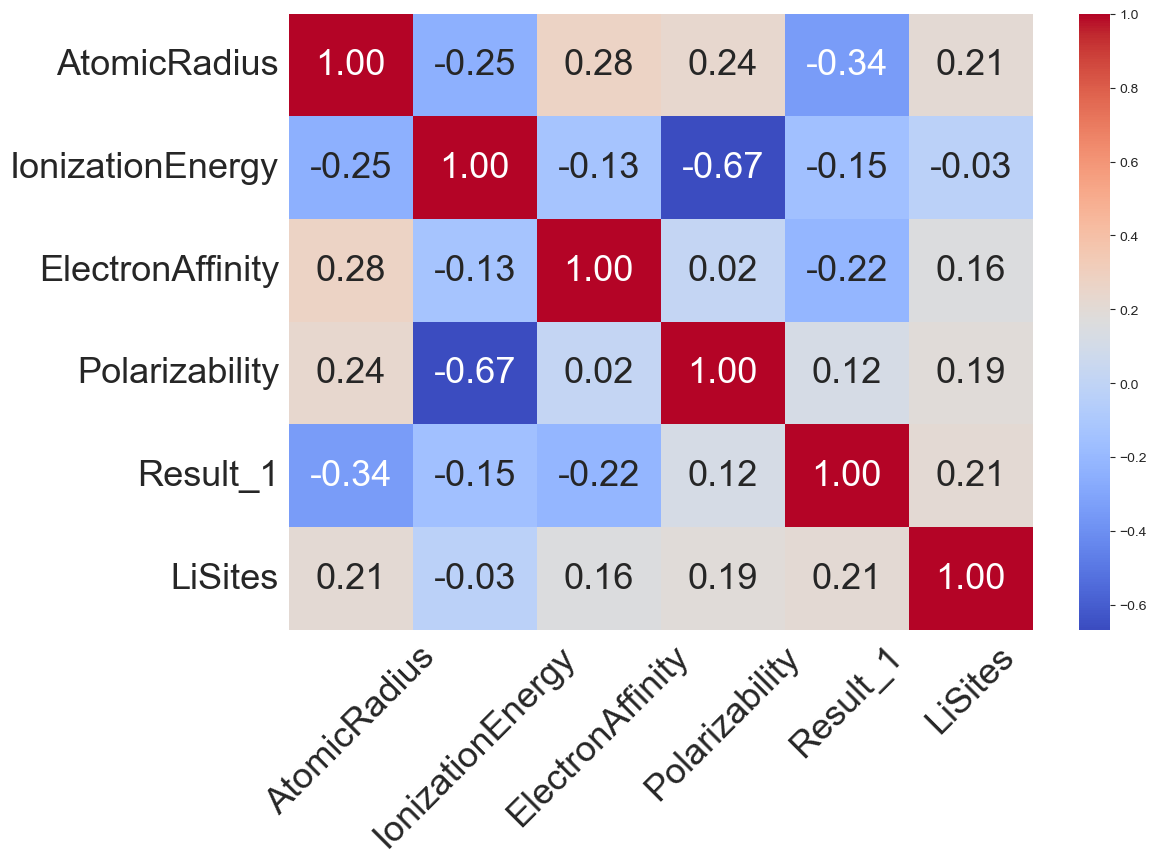

In [10]:
X = df.drop(columns=['Symbol','SpaceGroup','Result', 'Reduced Formula','res_per_volm_per_site'])

Y_total = df['results_per_total']
Y_li = df['results_per_li']


X.rename(columns={'results_per_total': 'Result_1'}, inplace=True)
X.rename(columns={'results_per_li': 'Result_2'}, inplace=True)
X.rename(columns={'results_per_counter_ion': 'Result_3'}, inplace=True)

X = X.drop(columns=['SpaceGroupNumber','CounterIonSites','Total Sites','Electronegativity','AtomicMass','Result_2','Result_3'])

#plot X 


plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(method='pearson'), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 26})
# plt.title('Spearman Correlation Matrix (Li Compounds 400+)')
plt.xticks(rotation=45, fontsize=26)
plt.yticks(rotation=0, fontsize=26)
sns.set(font_scale=1.5 )
plt.show()


#### reducing dimentionality

In [11]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# ------------------------------
# Example: Assume X and Y_li are already defined
# Replace these with your actual data loading process
# X = ... (DataFrame with features)
# Y_li = ... (target variable, Series or array)
# ------------------------------

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y_total, test_size=0.2, random_state=42)

# ============ Linear Regression (for reference) =============
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
mape_lin = mean_absolute_percentage_error(y_test, y_pred_lin) * 100  # MAPE in percentage
print(f"Linear Regression MAPE: {mape_lin:.2f}%")

# Get feature names and linear coefficients
features = X.columns
coefficients = lin_model.coef_
importance_dict_lin = {feature: coef for feature, coef in zip(features, coefficients)}
sorted_importances_lin = sorted(importance_dict_lin.items(), key=lambda x: abs(x[1]), reverse=True)
print("\nTop 10 Feature Importances (Linear Regression coefficients):")
for i, (feature, coef) in enumerate(sorted_importances_lin):
    print(f"{feature}: {coef:.4f}")
    if i >= 9:
        break

# ============ Gradient Boosting Regressor (GBR) =============
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
mape_gbr = mean_absolute_percentage_error(y_test, y_pred_gbr) * 100
print(f"\nGradient Boosting Regressor MAPE: {mape_gbr:.2f}%")

# Feature importances from GBR
gbr_importances = gbr_model.feature_importances_
importance_dict_gbr = {feature: imp for feature, imp in zip(features, gbr_importances)}
sorted_importances_gbr = sorted(importance_dict_gbr.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 Feature Importances (GBR):")
for i, (feature, imp) in enumerate(sorted_importances_gbr):
    print(f"{feature}: {imp:.4f}")
    if i >= 9:
        break

# ============ XGBoost Regressor (XGBR) =============
from xgboost import XGBRegressor

xgbr_model = XGBRegressor(random_state=42, verbosity=0)
xgbr_model.fit(X_train, y_train)
y_pred_xgbr = xgbr_model.predict(X_test)
mape_xgbr = mean_absolute_percentage_error(y_test, y_pred_xgbr) * 100
print(f"\nXGBoost Regressor MAPE: {mape_xgbr:.2f}%")

# Feature importances from XGBR
xgbr_importances = xgbr_model.feature_importances_
importance_dict_xgbr = {feature: imp for feature, imp in zip(features, xgbr_importances)}
sorted_importances_xgbr = sorted(importance_dict_xgbr.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 Feature Importances (XGBoost):")
for i, (feature, imp) in enumerate(sorted_importances_xgbr):
    print(f"{feature}: {imp:.4f}")
    if i >= 9:
        break


Linear Regression MAPE: 0.00%

Top 10 Feature Importances (Linear Regression coefficients):
Result_1: 1.0000
IonizationEnergy: -0.0000
LiSites: -0.0000
ElectronAffinity: -0.0000
AtomicRadius: -0.0000
Polarizability: 0.0000

Gradient Boosting Regressor MAPE: 2.66%

Top 10 Feature Importances (GBR):
Result_1: 1.0000
AtomicRadius: 0.0000
IonizationEnergy: 0.0000
Polarizability: 0.0000
LiSites: 0.0000
ElectronAffinity: 0.0000

XGBoost Regressor MAPE: 4.32%

Top 10 Feature Importances (XGBoost):
Result_1: 0.9983
Polarizability: 0.0011
ElectronAffinity: 0.0002
AtomicRadius: 0.0002
LiSites: 0.0002
IonizationEnergy: 0.0001


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid
gbr_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Create the regressor
gbr = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
gbr_grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=gbr_param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
gbr_grid_search.fit(X, Y_li)

# Best parameters and score
print("Best GBR Parameters:", gbr_grid_search.best_params_)
print("Best GBR MAPE:", -gbr_grid_search.best_score_ * 100)  # Convert to positive % error


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best GBR Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best GBR MAPE: 7.746186102919425


In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the regressor
xgb = XGBRegressor(random_state=42, verbosity=0)

# Set up GridSearchCV
xgb_grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
xgb_grid_search.fit(X, Y_li)

# Best parameters and score
print("Best XGB Parameters:", xgb_grid_search.best_params_)
print("Best XGB MAPE:", -xgb_grid_search.best_score_ * 100)  # Convert to positive % error


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best XGB Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best XGB MAPE: 7.923606838201096


In [14]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'max_depth': [5,],
    'learning_rate': [0.1],
    'n_estimators': [200],
    'subsample': [0.8]
}
gbr = XGBRegressor()
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [5],
                         'n_estimators': [200], 'subsample': [0.8]},
             return_train_score=True, scoring='neg_mean_absolute_error')

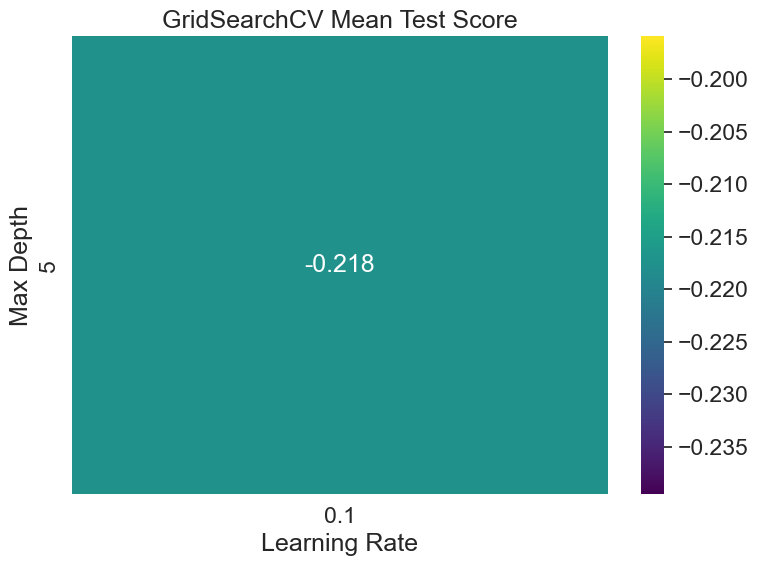

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results to DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Clean display of parameter combinations and scores
pivot_table = cv_results.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_learning_rate'
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap='viridis')
plt.title("GridSearchCV Mean Test Score")
plt.xlabel("Learning Rate")
plt.ylabel("Max Depth")
plt.tight_layout()
plt.show()


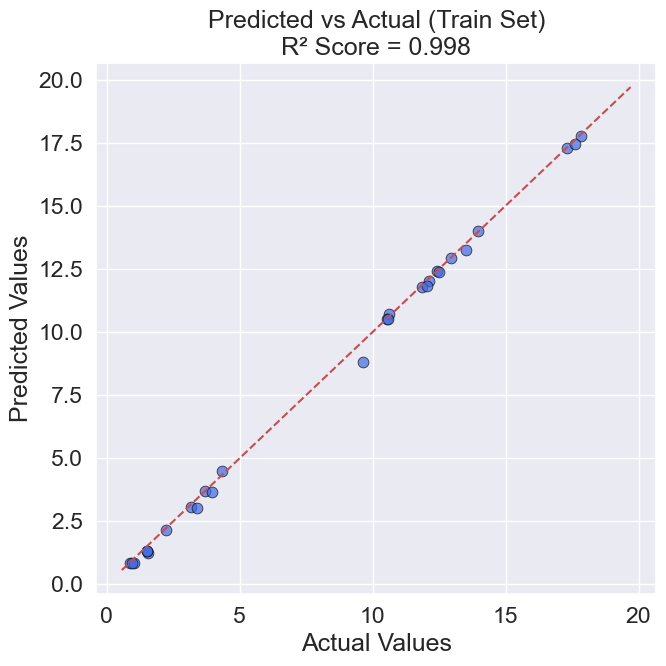

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# If you've already done model.predict(X_train)
y_test_pred = xgbr_model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test, y=y_test_pred, color='royalblue', s=60, edgecolor='black', alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # y = x line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Predicted vs Actual (Train Set)\nR² Score = {r2_score(y_test, y_test_pred):.3f}")
plt.grid(True)
plt.tight_layout()
plt.show()


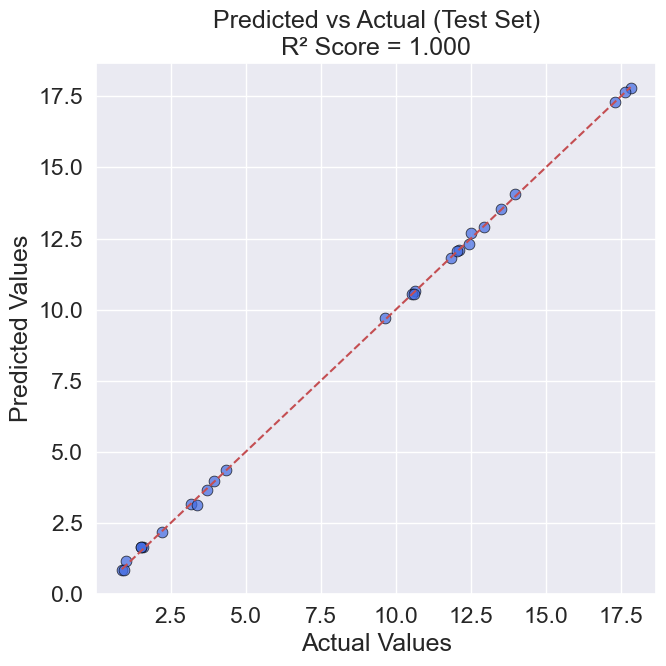

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# If you've already done model.predict(X_train)
y_test_pred = gbr_model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test, y=y_test_pred, color='royalblue', s=60, edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y = x line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Predicted vs Actual (Test Set)\nR² Score = {r2_score(y_test, y_test_pred):.3f}")
plt.grid(True)
plt.tight_layout()
plt.show()
